Sample result shape: (10, 16, 3, 64, 64)
Number of epochs: 10
Samples per epoch: 16


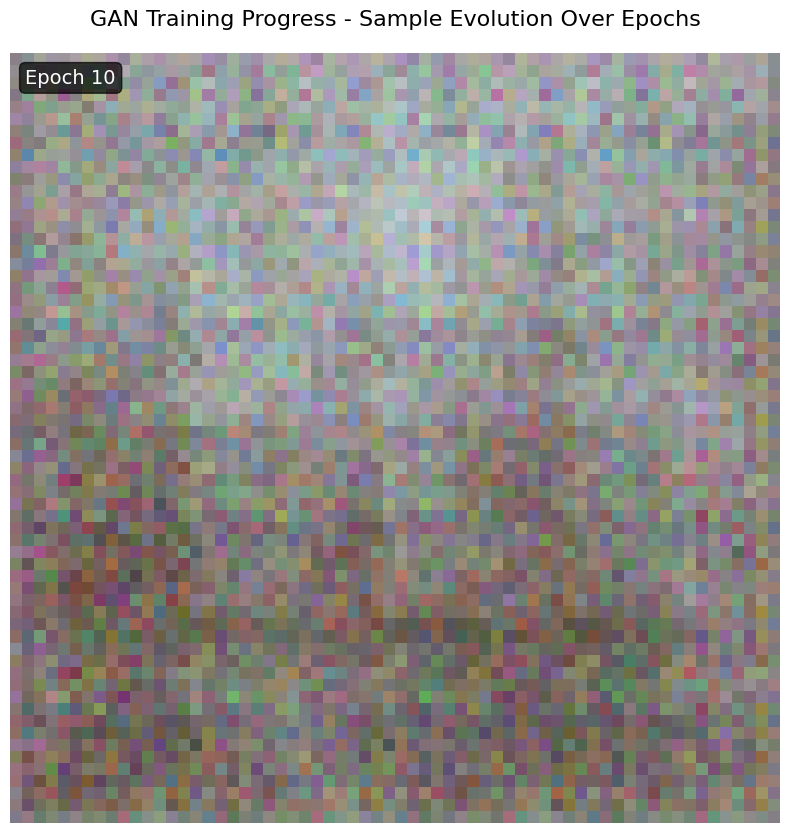

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

# Load the samples
run_name = "samples_spring-jazz-39.npy"
img_list = np.load(f"./artifacts/{run_name}")

print(f"Sample result shape: {img_list.shape}")
print(f"Number of epochs: {img_list.shape[0]}")
print(f"Samples per epoch: {img_list.shape[1]}")

# Create animation showing evolution of first sample over epochs
fig = plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("GAN Training Progress - Sample Evolution Over Epochs", fontsize=16, pad=20)

ims = []
for epoch_idx, epoch_samples in enumerate(img_list):
    # Take first sample from each epoch for animation
    sample = epoch_samples[0]  # Shape: (3, 64, 64)
    
    # Convert from (C, H, W) to (H, W, C) for matplotlib
    img_transposed = np.transpose(sample, (1, 2, 0))
    
    # Denormalize from [-1, 1] to [0, 1] for display
    img_normalized = (img_transposed + 1.0) / 2.0
    img_normalized = np.clip(img_normalized, 0, 1)
    
    # Create the plot for this frame with epoch label
    im = plt.imshow(img_normalized, animated=True)
    text = plt.text(0.02, 0.98, f'Epoch {epoch_idx + 1}', 
                   transform=plt.gca().transAxes, 
                   fontsize=14, color='white', 
                   bbox=dict(boxstyle='round', facecolor='black', alpha=0.7),
                   verticalalignment='top')
    ims.append([im, text])

# Create animation
ani = animation.ArtistAnimation(
    fig, ims, interval=300, repeat_delay=2000, blit=True
)

# Display the animation
HTML(ani.to_jshtml())